https://pypi.org/project/pyspectra/

Issue installing spc in terminal

In [1]:
# #import spc
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# from sklearn.decomposition import PCA

https://github.com/spectralpython/spectral/blob/master/spectral/algorithms/algorithms.py
This inlcudes info about some derivatives + code for other supervised and unsupervised learning.
Poss worth returning to

In [2]:
# from derivative import dxdt
# import numpy as np
# import rasterio as rio

# data = rio.open("../../preprocessed_data/dimensionality_reduction/erosion_2.tif")

# t = np.linspace(0,2*np.pi,50)
# # x = np.sin(x) ---- orignial
# # x = np.sin(data)

# # result3 = dxdt(x, t, kind="spectral")

# print(t)

Using the Excel spreadsheet sent by Doreen as a basis:

In [3]:
import rasterio as rio
erosion = rio.open('../../preprocessed_data/dimensionality_reduction/erosion.tif')
# number of bands
erosion.count
# read bands
array = erosion.read()
# convert to a DataFrame
import pandas as pd
erosion_df = pd.DataFrame()

array_num = 0
band_num = 1

for num in range(358):
    erosion_df['band' +str(band_num)]=array[array_num].ravel()
    array_num += 1
    band_num += 1


erosion_df.head(2)

# NB when do this, will want a PFT column, which will include in randmisation, then split the train and 
# test data into x (bands) and y (PFT)

/tmp/ipykernel_862/3860783183.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  restored_2006_df['band' +str(band_num)]=array[array_num].ravel()


,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band349,band350,band351,band352,band353,band354,band355,band356,band357,band358
0,0.001345,0.003004,0.005200,0.006938,0.007997,0.009621,0.011546,0.013068,0.014866,0.016658,...,0.075762,0.074589,0.073057,0.073504,0.070905,0.071431,0.071422,0.071477,0.070312,0.068295
1,0.000877,0.002685,0.004903,0.006067,0.007677,0.009598,0.011497,0.013095,0.015079,0.017192,...,0.081493,0.081584,0.079516,0.080833,0.078904,0.080250,0.079981,0.083030,0.080691,0.078542


In [4]:
erosion_df.loc['mean'] = erosion_df.mean()

In [5]:
erosion_df.tail(5)

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band349,band350,band351,band352,band353,band354,band355,band356,band357,band358
41204,0.006313,0.006670,0.008111,0.008937,0.009312,0.011193,0.013411,0.014908,0.017064,0.018886,...,0.088192,0.085125,0.084719,0.085069,0.083562,0.084349,0.084685,0.083484,0.082144,0.082575
41205,0.005050,0.006480,0.007731,0.008047,0.009027,0.011541,0.013428,0.014985,0.017027,0.019070,...,0.086382,0.085782,0.082360,0.086330,0.083862,0.085831,0.084167,0.084722,0.083112,0.080662
41206,0.005756,0.005457,0.005336,0.007325,0.008027,0.010946,0.013073,0.014930,0.017417,0.019690,...,0.105504,0.104739,0.104262,0.104952,0.102371,0.103104,0.103087,0.104389,0.103358,0.103153
41207,0.006353,0.005504,0.007039,0.007727,0.008774,0.011333,0.013250,0.015023,0.017376,0.019316,...,0.100763,0.099333,0.098201,0.099673,0.097118,0.095852,0.100292,0.097757,0.097486,0.098061
mean,0.002886,0.003399,0.005262,0.006116,0.007016,0.009298,0.011288,0.012867,0.014939,0.016843,...,0.085408,0.085292,0.083829,0.084812,0.082847,0.082650,0.082832,0.083412,0.081935,0.081869


In [6]:
wavelengths = pd.read_csv("../../preprocessed_data/wavelengths.csv")

In [7]:
wavelengths.describe()

,Wavelength
count,358.000000
mean,1349.831039
std,605.878480
min,377.071821
25%,824.094321
50%,1271.116821
75%,1948.539321
max,2395.561821


In [8]:
mean = erosion_df.loc[['mean']]
mean.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band349,band350,band351,band352,band353,band354,band355,band356,band357,band358
mean,0.002886,0.003399,0.005262,0.006116,0.007016,0.009298,0.011288,0.012867,0.014939,0.016843,...,0.085408,0.085292,0.083829,0.084812,0.082847,0.08265,0.082832,0.083412,0.081935,0.081869


In [9]:
original_spectra = mean.transpose()
original_spectra = original_spectra.rename(columns={'mean': 'Original Spectra'})
#original_spectra = original_spectra.rename(index={0:357}) # want to rename to match the other dataframe
original_spectra = original_spectra.reset_index()
# original_spectra = 
original_spectra.head()
original_spectra.describe()

,Original Spectra
count,358.000000
mean,0.194170
std,0.119307
min,0.002886
25%,0.095465
50%,0.188568
75%,0.327422
max,0.597839


In [10]:
#derivatives = pd.DataFrame(wavelengths)
derivatives = pd.concat([wavelengths,original_spectra], axis=1)
derivatives.tail()

# why has it lost one of the bands (there should be 358 - reason = starts at 0) and why is the original spectra NaN
# - matching number of values + changed the index names (row headings) to see if that was the issue?

,Wavelength,index,Original Spectra
353,2375.531821,band354,0.082650
354,2380.541821,band355,0.082832
355,2385.551821,band356,0.083412
356,2390.561821,band357,0.081935
357,2395.561821,band358,0.081869


In [11]:
#derivatives["First Derivative"] = ('Original Spectra' / 'Wavelength') # don't know how to write the equation here - see excel (interaction between rows as well as columns)
derivatives["Shifted_wavelength"] = derivatives["Wavelength"].shift(-1, fill_value=0)
derivatives["Shifted_original_spectra"] = derivatives["Original Spectra"].shift(-1, fill_value=0)

derivatives.tail()

,Wavelength,index,Original Spectra,Shifted_wavelength,Shifted_original_spectra
353,2375.531821,band354,0.082650,2380.541821,0.082832
354,2380.541821,band355,0.082832,2385.551821,0.083412
355,2385.551821,band356,0.083412,2390.561821,0.081935
356,2390.561821,band357,0.081935,2395.561821,0.081869
357,2395.561821,band358,0.081869,0.000000,0.000000


In [12]:
derivatives["First_derivative"] = (derivatives["Shifted_original_spectra"] - derivatives["Original Spectra"]) / (derivatives["Shifted_wavelength"] - derivatives["Wavelength"])

derivatives.tail()

,Wavelength,index,Original Spectra,Shifted_wavelength,Shifted_original_spectra,First_derivative
353,2375.531821,band354,0.082650,2380.541821,0.082832,0.000036
354,2380.541821,band355,0.082832,2385.551821,0.083412,0.000116
355,2385.551821,band356,0.083412,2390.561821,0.081935,-0.000295
356,2390.561821,band357,0.081935,2395.561821,0.081869,-0.000013
357,2395.561821,band358,0.081869,0.000000,0.000000,0.000034


In [13]:
derivatives["Second_derivative"] = (derivatives["Shifted_original_spectra"] - derivatives["Original Spectra"]*2) / (derivatives["Shifted_wavelength"] - derivatives["Wavelength"])**2

derivatives.tail()

,Wavelength,index,Original Spectra,Shifted_wavelength,Shifted_original_spectra,First_derivative,Second_derivative
353,2375.531821,band354,0.082650,2380.541821,0.082832,0.000036,-3.285533e-03
354,2380.541821,band355,0.082832,2385.551821,0.083412,0.000116,-3.276986e-03
355,2385.551821,band356,0.083412,2390.561821,0.081935,-0.000295,-3.382038e-03
356,2390.561821,band357,0.081935,2395.561821,0.081869,-0.000013,-3.280054e-03
357,2395.561821,band358,0.081869,0.000000,0.000000,0.000034,-2.853211e-08


[Text(0.5, 0, 'Bands'), Text(0, 0.5, 'Reflectance')]

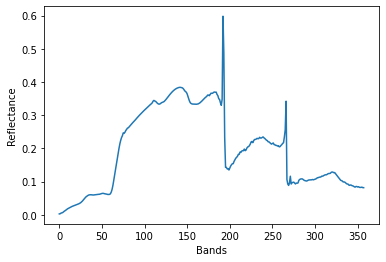

In [14]:
original_spectra_graph = derivatives["Original Spectra"].plot.line()
original_spectra_graph.set(xlabel="Bands", ylabel="Reflectance")

[Text(0.5, 0, 'Bands'), Text(0, 0.5, 'Reflectance')]

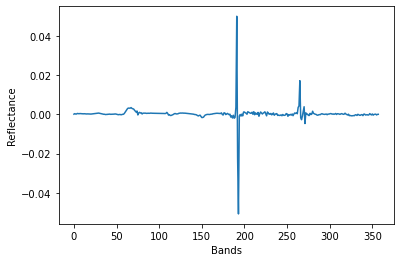

In [15]:
first_derivatives_graph = derivatives["First_derivative"].plot.line()
first_derivatives_graph.set(xlabel="Bands", ylabel="Reflectance")

[Text(0.5, 0, 'Bands'), Text(0, 0.5, 'Reflectance')]

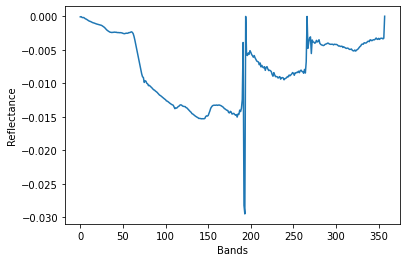

In [16]:
second_derivatives_graph = derivatives["Second_derivative"].plot.line()
second_derivatives_graph.set(xlabel="Bands", ylabel="Reflectance")

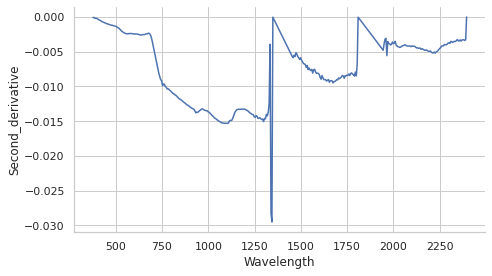

In [17]:
import seaborn as sns

sns.set_theme(style = "whitegrid")

sns.relplot(x="Wavelength", y="Second_derivative", kind="line", data=derivatives, height=4, aspect=7/4)

Need to create first derivatives for different PFTs
1. import csv with the PFTs for the samples - done
2. calculate the first derivative for each sample - done
4. create graph with all 6 derivatives on it (mean of each PFT) - need to split into each
5. put into a table which can then be used in RF
6. run RF
7. compare to kmc
8. repeat with second derivative


In [1]:
import pandas as pd
import geopandas
train_test = pd.read_csv('../erosion_gdf2.csv')

train_test['geometry'] = geopandas.GeoSeries.from_wkt(train_test['geometry'])

train_test_gdf = geopandas.GeoDataFrame(train_test, geometry='geometry')

train_test_gdf



/home/rzw/.local/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


,Unnamed: 0,band1,band2,band3,band4,band5,band6,band7,band8,band9,...,band352,band353,band354,band355,band356,band357,band358,POINTID,geometry,VALUE
0,0,-0.000152,0.000986,0.004008,0.005472,0.005756,0.007789,0.009954,0.011664,0.013060,...,0.065499,0.062266,0.063747,0.060986,0.059916,0.061251,0.058821,1,POINT (448210.950 6481848.324),-0.000152
1,1,0.000510,0.000955,0.004493,0.004698,0.006199,0.008139,0.010138,0.011971,0.014497,...,0.062596,0.063473,0.060694,0.062735,0.062540,0.061148,0.063097,2,POINT (448216.050 6481848.324),0.000510
2,2,0.000565,0.001765,0.003405,0.005407,0.005677,0.008092,0.010280,0.011298,0.014343,...,0.068078,0.066012,0.062762,0.061232,0.066458,0.060376,0.063481,3,POINT (448221.150 6481848.324),0.000565
3,3,0.000197,0.001537,0.003782,0.005053,0.006393,0.007700,0.010634,0.011635,0.013751,...,0.065658,0.066481,0.064339,0.062169,0.064833,0.062855,0.061849,4,POINT (448226.250 6481848.324),0.000197
4,4,0.000440,0.001375,0.003630,0.005567,0.006266,0.008108,0.010253,0.010777,0.013712,...,0.063027,0.059421,0.060017,0.062054,0.061573,0.059307,0.060271,5,POINT (448231.350 6481848.324),0.000440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38803,38803,0.001394,0.002932,0.004483,0.004704,0.005632,0.008030,0.010003,0.011651,0.013787,...,0.079240,0.080583,0.077058,0.078510,0.079759,0.077709,0.074454,38804,POINT (449185.050 6480843.624),0.001394
38804,38804,0.001595,0.003533,0.005756,0.004066,0.005633,0.008298,0.010117,0.011662,0.014212,...,0.079868,0.079635,0.077944,0.079044,0.077693,0.078720,0.076663,38805,POINT (449190.150 6480843.624),0.001595
38805,38805,0.003444,0.002441,0.004458,0.004978,0.005722,0.008175,0.010115,0.011722,0.013806,...,0.082580,0.078714,0.078940,0.081538,0.078073,0.077943,0.078941,38806,POINT (449195.250 6480843.624),0.003444
38806,38806,0.003120,-0.000287,0.004544,0.004693,0.005794,0.008127,0.010116,0.011791,0.013700,...,0.084511,0.081187,0.081680,0.083110,0.081314,0.081436,0.078879,38807,POINT (449200.350 6480843.624),0.003120


In [2]:
wavelengths = pd.read_csv("../../preprocessed_data/wavelengths.csv")

sample = 0
# make a dictionary of PFT and num_sample - what suggested by forums, but now what? - use to name the new data frame/column
# pft_dict = pd.Series(train_test_gdf.PFT.values,index=train_test_gdf.num_sample).to_dict()
# when print, only shows water

count_row = train_test_gdf.shape[0]

# want to make a dataframe with columns named using dictionary - key and value e.g. 
first_derivative = wavelengths
second_derivative = wavelengths

# create individual wavelength tables for each sample - use a for loop - extract the row based on the sample number
# transpose, create full table of derivatives - give the tables names based on PFT (link to PFT column) and number - if PFT == prev +1, otherwise start at 1

for num in range(count_row):
    absorption_all_cols = train_test_gdf.loc[[sample]]
    absorption = absorption_all_cols.iloc[:, 1:359]
    original_spectra = absorption.transpose()
    original_spectra = original_spectra.rename(columns={sample: 'Original Spectra'})
    #original_spectra = original_spectra.rename(index={0:357}) # want to rename to match the other dataframe
    original_spectra = original_spectra.reset_index()
    #derivatives = pd.DataFrame(wavelengths)
    derivatives = pd.concat([wavelengths,original_spectra], axis=1)
    derivatives.tail()
    #derivatives["First Derivative"] = ('Original Spectra' / 'Wavelength') # don't know how to write the equation here - see excel (interaction between rows as well as columns)
    derivatives["Shifted_wavelength"] = derivatives["Wavelength"].shift(-1, fill_value=0)
    derivatives["Shifted_original_spectra"] = derivatives["Original Spectra"].shift(-1, fill_value=0)
    derivatives["First_derivative"] = (derivatives["Shifted_original_spectra"] - derivatives["Original Spectra"]) / (derivatives["Shifted_wavelength"] - derivatives["Wavelength"])
    derivatives["Second_derivative"] = (derivatives["Shifted_original_spectra"] - derivatives["Original Spectra"]*2) / (derivatives["Shifted_wavelength"] - derivatives["Wavelength"])**2
    # name the table and add to two additional tables - a first derivative one and a second derivative one
    # need to improve naming of columns to include PFT and number
    first_derivative["sample"] = derivatives[["First_derivative"]]
    first_derivative = first_derivative.rename(columns = {"sample": sample})
    second_derivative["sample"] = derivatives[["Second_derivative"]]
    second_derivative = second_derivative.rename(columns = {"sample": sample})
    sample += 1


second_derivative


,Wavelength,0,1,2,3,4,5,6,7,8,...,38798,38799,38800,38801,38802,38803,38804,38805,38806,38807
0,377.071821,5.134957e-05,-2.572946e-06,2.526813e-05,4.556509e-05,1.973964e-05,8.909392e-06,2.817462e-05,3.798110e-05,4.100646e-05,...,2.842557e-05,-1.113338e-04,-1.688480e-04,-1.416490e-04,-7.915889e-05,5.743085e-06,1.363430e-05,-1.771837e-04,-2.600476e-04,-1.333012e-04
1,382.081821,8.116364e-05,1.029301e-04,-4.986602e-06,2.821378e-05,3.510274e-05,1.260939e-05,1.875926e-05,1.383509e-05,1.117850e-05,...,-3.032126e-05,-5.942183e-05,-8.278856e-05,-2.513297e-06,5.679633e-05,-5.496993e-05,-5.216386e-05,-1.690335e-05,2.039442e-04,1.777552e-04
2,387.091821,-1.014019e-04,-1.707926e-04,-5.588357e-05,-1.000650e-04,-6.746678e-05,-1.089910e-04,-1.009518e-04,-1.089280e-04,-1.072151e-04,...,-1.437924e-04,-9.558024e-05,-1.178836e-04,-1.145949e-04,-8.315372e-05,-1.698488e-04,-2.966877e-04,-1.568959e-04,-1.751201e-04,-1.566761e-04
3,392.101821,-2.074980e-04,-1.279249e-04,-2.054999e-04,-1.485302e-04,-1.947287e-04,-1.654489e-04,-1.726464e-04,-1.745041e-04,-1.776715e-04,...,-1.162660e-04,-1.611263e-04,-1.646886e-04,-1.734955e-04,-1.299940e-04,-1.510132e-04,-9.994335e-05,-1.693615e-04,-1.436917e-04,-1.047416e-04
4,397.101821,-1.483412e-04,-1.696479e-04,-1.299474e-04,-2.026386e-04,-1.762995e-04,-1.654340e-04,-1.726778e-04,-1.165874e-04,-1.222647e-04,...,-1.275910e-04,-1.214988e-04,-1.148725e-04,-1.309461e-04,-1.433587e-04,-1.288632e-04,-1.182029e-04,-1.301978e-04,-1.378712e-04,-1.396933e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2375.531821,-2.649699e-03,-2.336741e-03,-2.561443e-03,-2.649769e-03,-2.309950e-03,-2.470550e-03,-2.569204e-03,-2.591931e-03,-2.574291e-03,...,-3.670193e-03,-3.300651e-03,-3.401090e-03,-3.126346e-03,-3.070579e-03,-3.012203e-03,-3.061524e-03,-3.041472e-03,-3.197148e-03,-3.299506e-03
354,2380.541821,-2.472336e-03,-2.507134e-03,-2.231251e-03,-2.370680e-03,-2.491456e-03,-2.569438e-03,-2.093122e-03,-2.490198e-03,-2.604301e-03,...,-3.533514e-03,-3.706948e-03,-3.348539e-03,-3.064473e-03,-3.233447e-03,-3.078099e-03,-3.202936e-03,-3.386567e-03,-3.382718e-03,-3.730940e-03
355,2385.551821,-2.333900e-03,-2.547099e-03,-2.890047e-03,-2.661798e-03,-2.543352e-03,-2.379796e-03,-2.473090e-03,-2.747728e-03,-2.547234e-03,...,-3.833758e-03,-3.417899e-03,-3.757119e-03,-3.364924e-03,-2.835498e-03,-3.259285e-03,-3.054463e-03,-3.115664e-03,-3.234743e-03,-3.241921e-03
356,2390.561821,-2.547204e-03,-2.367945e-03,-2.290862e-03,-2.554471e-03,-2.333711e-03,-2.384082e-03,-2.288020e-03,-2.673551e-03,-2.680123e-03,...,-3.446978e-03,-3.377324e-03,-3.209869e-03,-3.060063e-03,-3.110317e-03,-3.238552e-03,-3.231057e-03,-3.077767e-03,-3.359752e-03,-3.656875e-03


In [5]:
#change the name of headings to reflect PFT

first_derivative_transposed = first_derivative.transpose()
first_derivative_transposed = first_derivative_transposed.drop('Wavelength')
first_derivative_transposed

second_derivative_transposed = second_derivative.transpose()
second_derivative_transposed = second_derivative_transposed.drop('Wavelength')
second_derivative_transposed

# pft = train_test_gdf[['PFT']]
geometry = train_test_gdf[['geometry']]
# # first_derivative_transposed['PFT'] = pft
first_derivative_transposed['geometry'] = geometry

# second_derivative_transposed['PFT'] = pft
second_derivative_transposed['geometry'] = geometry

# first_derivative_transposed['geometry'] = geopandas.GeoSeries.from_wkt(first_derivative_transposed['geometry'])
# first_derivative_gdf = geopandas.GeoDataFrame(first_derivative_transposed, geometry='geometry')

# first_derivative_gdf

first_derivative_transposed.to_csv('first_derivative_erosion.csv')
second_derivative_transposed.to_csv('second_derivative_erosion.csv')

In [ ]:
# first_derivative_calluna_mix = first_derivative.iloc[:, 0:31]
# first_derivative_pool_bogbean = first_derivative.iloc[:, 31:61]
# first_derivative_rushes_sedges = first_derivative.iloc[:, 61:91]
# first_derivative_shrub_sphagnum = first_derivative.iloc[:, 91:121]
# first_derivative_sphagnum_r = first_derivative.iloc[:, 121:151]
# first_derivative_water = first_derivative.iloc[:, 151:181]

In [ ]:
# first_derivative_calluna_mix['mean'] = first_derivative_calluna_mix.mean(axis=1)
# first_derivative_pool_bogbean['mean'] = first_derivative_pool_bogbean.mean(axis=1)
# first_derivative_rushes_sedges['mean'] = first_derivative_rushes_sedges.mean(axis=1)
# first_derivative_shrub_sphagnum['mean'] = first_derivative_shrub_sphagnum.mean(axis=1)
# first_derivative_sphagnum_r['mean'] = first_derivative_sphagnum_r.mean(axis=1)
# first_derivative_water['mean'] = first_derivative_water.mean(axis=1)

# calluna_mix_mean = first_derivative_calluna_mix[['mean']]
# calluna_mix_mean = calluna_mix_mean.rename(columns = {'mean':'calluna_mix'})
# pool_bogbean_mean = first_derivative_pool_bogbean[['mean']]
# pool_bogbean_mean = pool_bogbean_mean.rename(columns = {'mean':'pool_bogbean'})
# rushes_sedges_mean = first_derivative_rushes_sedges[['mean']]
# rushes_sedges_mean = rushes_sedges_mean.rename(columns = {'mean':'rushes_sedges'})
# shrub_sphagnum_mean = first_derivative_shrub_sphagnum[['mean']]
# shrub_sphagnum_mean = shrub_sphagnum_mean.rename(columns = {'mean':'shrub_sphagnum'})
# sphagnum_r_mean = first_derivative_sphagnum_r[['mean']]
# sphagnum_r_mean = sphagnum_r_mean.rename(columns = {'mean':'sphagnum_r'})
# water_mean = first_derivative_water[['mean']]
# water_mean = water_mean.rename(columns = {'mean':'water'})


# mean = pd.concat([wavelengths, calluna_mix_mean, pool_bogbean_mean, rushes_sedges_mean, shrub_sphagnum_mean, sphagnum_r_mean, water_mean], axis=1)

# mean

In [ ]:
# import seaborn as sns

# sns.set_theme(style = "whitegrid")

# sns.relplot(data=mean.iloc[:, 3:], kind="line")
# plt.xlabel("Wavelength (nm)")
# plt.ylabel("Absorbtion")
# # sns.relplot(x="Wavelength", y="calluna_mix", kind="line", data=mean, height=4, aspect=7/4)
# #sns.lineplot(data=mean)

# # sns.lineplot(data=mean, x="Wavelength", y="absorption")

# can't get the graph working - multiple ys and 1 x.

1. Create derivatives for full data set (when made set geometry)
2. Split into the four sections - need for maps

In [33]:
import pandas as pd
import geopandas
erosion = pd.read_csv('../erosion_gdf.csv')

erosion['geometry'] = geopandas.GeoSeries.from_wkt(erosion['geometry'])

erosion_gdf = geopandas.GeoDataFrame(erosion, geometry='geometry')

erosion_gdf.head()

,Unnamed: 0,band1,band2,band3,band4,band5,band6,band7,band8,band9,...,band352,band353,band354,band355,band356,band357,band358,POINTID,geometry,VALUE
0,0,-0.000152,0.000986,0.004008,0.005472,0.005756,0.007789,0.009954,0.011664,0.013060,...,0.065499,0.062266,0.063747,0.060986,0.059916,0.061251,0.058821,1,POINT (448210.950 6481848.324),-0.000152
1,1,0.000510,0.000955,0.004493,0.004698,0.006199,0.008139,0.010138,0.011971,0.014497,...,0.062596,0.063473,0.060694,0.062735,0.062540,0.061148,0.063097,2,POINT (448216.050 6481848.324),0.000510
2,2,0.000565,0.001765,0.003405,0.005407,0.005677,0.008092,0.010280,0.011298,0.014343,...,0.068078,0.066012,0.062762,0.061232,0.066458,0.060376,0.063481,3,POINT (448221.150 6481848.324),0.000565
3,3,0.000197,0.001537,0.003782,0.005053,0.006393,0.007700,0.010634,0.011635,0.013751,...,0.065658,0.066481,0.064339,0.062169,0.064833,0.062855,0.061849,4,POINT (448226.250 6481848.324),0.000197
4,4,0.000440,0.001375,0.003630,0.005567,0.006266,0.008108,0.010253,0.010777,0.013712,...,0.063027,0.059421,0.060017,0.062054,0.061573,0.059307,0.060271,5,POINT (448231.350 6481848.324),0.000440


In [34]:
wavelengths = pd.read_csv("../../preprocessed_data/wavelengths.csv")

sample = 0
# make a dictionary of PFT and num_sample - what suggested by forums, but now what? - use to name the new data frame/column
# pft_dict = pd.Series(erosion_gdf.PFT.values,index=erosion_gdf.num_sample).to_dict()
# when print, only shows water

count_row = erosion_gdf.shape[0]

# want to make a dataframe with columns named using dictionary - key and value e.g. 
first_derivative = wavelengths
second_derivative = wavelengths

# create individual wavelength tables for each sample - use a for loop - extract the row based on the sample number
# transpose, create full table of derivatives - give the tables names based on PFT (link to PFT column) and number - if PFT == prev +1, otherwise start at 1

for num in range(count_row):
    absorption_all_cols = erosion_gdf.loc[[sample]]
    absorption = absorption_all_cols.iloc[:, 1:359]
    original_spectra = absorption.transpose()
    original_spectra = original_spectra.rename(columns={sample: 'Original Spectra'})
    #original_spectra = original_spectra.rename(index={0:357}) # want to rename to match the other dataframe
    original_spectra = original_spectra.reset_index()
    #derivatives = pd.DataFrame(wavelengths)
    derivatives = pd.concat([wavelengths,original_spectra], axis=1)
    derivatives.tail()
    #derivatives["First Derivative"] = ('Original Spectra' / 'Wavelength') # don't know how to write the equation here - see excel (interaction between rows as well as columns)
    derivatives["Shifted_wavelength"] = derivatives["Wavelength"].shift(-1, fill_value=0)
    derivatives["Shifted_original_spectra"] = derivatives["Original Spectra"].shift(-1, fill_value=0)
    derivatives["First_derivative"] = (derivatives["Shifted_original_spectra"] - derivatives["Original Spectra"]) / (derivatives["Shifted_wavelength"] - derivatives["Wavelength"])
    derivatives["Second_derivative"] = (derivatives["Shifted_original_spectra"] - derivatives["Original Spectra"]*2) / (derivatives["Shifted_wavelength"] - derivatives["Wavelength"])**2
    # name the table and add to two additional tables - a first derivative one and a second derivative one
    # need to improve naming of columns to include PFT and number
    first_derivative["sample"] = derivatives[["First_derivative"]]
    first_derivative = first_derivative.rename(columns = {"sample": sample})
    second_derivative["sample"] = derivatives[["Second_derivative"]]
    second_derivative = second_derivative.rename(columns = {"sample": sample})
    sample += 1


second_derivative


,Wavelength,0,1,2,3,4,5,6,7,8,...,38798,38799,38800,38801,38802,38803,38804,38805,38806,38807
0,377.071821,5.134957e-05,-2.572946e-06,2.526813e-05,4.556509e-05,1.973964e-05,8.909392e-06,2.817462e-05,3.798110e-05,4.100646e-05,...,2.842557e-05,-1.113338e-04,-1.688480e-04,-1.416490e-04,-7.915889e-05,5.743085e-06,1.363430e-05,-1.771837e-04,-2.600476e-04,-1.333012e-04
1,382.081821,8.116364e-05,1.029301e-04,-4.986602e-06,2.821378e-05,3.510274e-05,1.260939e-05,1.875926e-05,1.383509e-05,1.117850e-05,...,-3.032126e-05,-5.942183e-05,-8.278856e-05,-2.513297e-06,5.679633e-05,-5.496993e-05,-5.216386e-05,-1.690335e-05,2.039442e-04,1.777552e-04
2,387.091821,-1.014019e-04,-1.707926e-04,-5.588357e-05,-1.000650e-04,-6.746678e-05,-1.089910e-04,-1.009518e-04,-1.089280e-04,-1.072151e-04,...,-1.437924e-04,-9.558024e-05,-1.178836e-04,-1.145949e-04,-8.315372e-05,-1.698488e-04,-2.966877e-04,-1.568959e-04,-1.751201e-04,-1.566761e-04
3,392.101821,-2.074980e-04,-1.279249e-04,-2.054999e-04,-1.485302e-04,-1.947287e-04,-1.654489e-04,-1.726464e-04,-1.745041e-04,-1.776715e-04,...,-1.162660e-04,-1.611263e-04,-1.646886e-04,-1.734955e-04,-1.299940e-04,-1.510132e-04,-9.994335e-05,-1.693615e-04,-1.436917e-04,-1.047416e-04
4,397.101821,-1.483412e-04,-1.696479e-04,-1.299474e-04,-2.026386e-04,-1.762995e-04,-1.654340e-04,-1.726778e-04,-1.165874e-04,-1.222647e-04,...,-1.275910e-04,-1.214988e-04,-1.148725e-04,-1.309461e-04,-1.433587e-04,-1.288632e-04,-1.182029e-04,-1.301978e-04,-1.378712e-04,-1.396933e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2375.531821,-2.649699e-03,-2.336741e-03,-2.561443e-03,-2.649769e-03,-2.309950e-03,-2.470550e-03,-2.569204e-03,-2.591931e-03,-2.574291e-03,...,-3.670193e-03,-3.300651e-03,-3.401090e-03,-3.126346e-03,-3.070579e-03,-3.012203e-03,-3.061524e-03,-3.041472e-03,-3.197148e-03,-3.299506e-03
354,2380.541821,-2.472336e-03,-2.507134e-03,-2.231251e-03,-2.370680e-03,-2.491456e-03,-2.569438e-03,-2.093122e-03,-2.490198e-03,-2.604301e-03,...,-3.533514e-03,-3.706948e-03,-3.348539e-03,-3.064473e-03,-3.233447e-03,-3.078099e-03,-3.202936e-03,-3.386567e-03,-3.382718e-03,-3.730940e-03
355,2385.551821,-2.333900e-03,-2.547099e-03,-2.890047e-03,-2.661798e-03,-2.543352e-03,-2.379796e-03,-2.473090e-03,-2.747728e-03,-2.547234e-03,...,-3.833758e-03,-3.417899e-03,-3.757119e-03,-3.364924e-03,-2.835498e-03,-3.259285e-03,-3.054463e-03,-3.115664e-03,-3.234743e-03,-3.241921e-03
356,2390.561821,-2.547204e-03,-2.367945e-03,-2.290862e-03,-2.554471e-03,-2.333711e-03,-2.384082e-03,-2.288020e-03,-2.673551e-03,-2.680123e-03,...,-3.446978e-03,-3.377324e-03,-3.209869e-03,-3.060063e-03,-3.110317e-03,-3.238552e-03,-3.231057e-03,-3.077767e-03,-3.359752e-03,-3.656875e-03


In [35]:
first_derivative_transposed = first_derivative.transpose()
first_derivative_transposed = first_derivative_transposed.drop('Wavelength')
first_derivative_transposed

second_derivative_transposed = second_derivative.transpose()
second_derivative_transposed = second_derivative_transposed.drop('Wavelength')


geometry = erosion_gdf[['geometry']]
first_derivative_transposed['geometry'] = geometry
second_derivative_transposed['geometry'] = geometry


second_derivative_transposed

,0,1,2,3,4,5,6,7,8,9,...,349,350,351,352,353,354,355,356,357,geometry
0,0.000051,0.000081,-0.000101,-0.000207,-0.000148,-0.000224,-0.000328,-0.000409,-0.000446,-0.000499,...,-0.002650,-0.002279,-0.002738,-0.002422,-0.002650,-0.002472,-0.002334,-0.002547,-2.049979e-08,POINT (448210.950434339 6481848.32404281)
1,-0.000003,0.000103,-0.000171,-0.000128,-0.000170,-0.000245,-0.000331,-0.000376,-0.000539,-0.000561,...,-0.002653,-0.002468,-0.002459,-0.002640,-0.002337,-0.002507,-0.002547,-0.002368,-2.198993e-08,POINT (448216.050434339 6481848.32404281)
2,0.000025,-0.000005,-0.000056,-0.000205,-0.000130,-0.000235,-0.000369,-0.000329,-0.000506,-0.000584,...,-0.002659,-0.002434,-0.002795,-0.002759,-0.002561,-0.002231,-0.002890,-0.002291,-2.212387e-08,POINT (448221.150434339 6481848.32404281)
3,0.000046,0.000028,-0.000100,-0.000149,-0.000203,-0.000190,-0.000384,-0.000379,-0.000476,-0.000560,...,-0.002668,-0.002593,-0.002583,-0.002734,-0.002650,-0.002371,-0.002662,-0.002554,-2.155488e-08,POINT (448226.2504343389 6481848.32404281)
4,0.000020,0.000035,-0.000067,-0.000195,-0.000176,-0.000238,-0.000388,-0.000312,-0.000510,-0.000486,...,-0.002565,-0.002479,-0.002655,-0.002344,-0.002310,-0.002491,-0.002543,-0.002334,-2.100502e-08,POINT (448231.3504343389 6481848.32404281)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38803,0.000006,-0.000055,-0.000170,-0.000151,-0.000129,-0.000241,-0.000333,-0.000379,-0.000458,-0.000576,...,-0.003308,-0.003210,-0.003103,-0.003351,-0.003012,-0.003078,-0.003259,-0.003239,-2.594802e-08,POINT (449185.0504343346 6480843.624042884)
38804,0.000014,-0.000052,-0.000297,-0.000100,-0.000118,-0.000258,-0.000342,-0.000363,-0.000483,-0.000588,...,-0.003219,-0.003197,-0.003191,-0.003240,-0.003062,-0.003203,-0.003054,-0.003231,-2.671778e-08,POINT (449190.1504343345 6480843.624042884)
38805,-0.000177,-0.000017,-0.000157,-0.000169,-0.000130,-0.000248,-0.000339,-0.000384,-0.000466,-0.000557,...,-0.003288,-0.002968,-0.003444,-0.003127,-0.003041,-0.003387,-0.003116,-0.003078,-2.751183e-08,POINT (449195.2504343345 6480843.624042884)
38806,-0.000260,0.000204,-0.000175,-0.000144,-0.000138,-0.000244,-0.000336,-0.000394,-0.000457,-0.000555,...,-0.003361,-0.003183,-0.003499,-0.003215,-0.003197,-0.003383,-0.003235,-0.003360,-2.748995e-08,POINT (449200.3504343345 6480843.624042884)


In [36]:
first_derivative_transposed.to_csv('first_derivative_full_erosion.csv')
second_derivative_transposed.to_csv('second_derivative_full_erosion.csv')